In [70]:
##Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
data = pd.read_csv('kidney_disease.csv')

In [72]:
print(data)

      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    

In [73]:
# number of rows and columns in the dataset
data.shape

(400, 26)

In [74]:
# getting more information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [75]:
# getting some statistical measures about the data
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


###next we iterates over each column in the DataFrame to checks if the data type of the column is object and print the column name and the number of unique values in that column.

In [76]:
for col in data.columns:
  if data[col].dtype == 'object':
    print(f'{col}, {data[col].nunique()}\n')

rbc, 2

pc, 2

pcc, 2

ba, 2

pcv, 44

wc, 92

rc, 49

htn, 2

dm, 5

cad, 3

appet, 2

pe, 2

ane, 2

classification, 3



### Getting more information about the dataset

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## distribution of target variable

In [78]:
data['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

### missing value treatment

<AxesSubplot:>

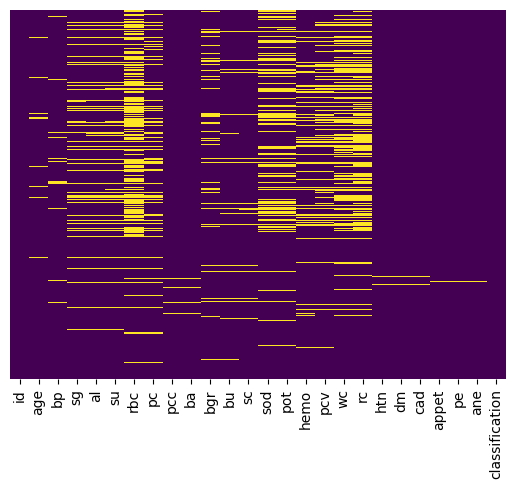

In [79]:
sns.heatmap(data.isna(),yticklabels=False,cbar=False,cmap='viridis')

There are lots of missing values in the dataset.

There is need to find out the percentage of missing values to give us a better sense of the scale of this problem.

In [80]:
total_cells = np.product(data.shape)
total_missing = data.isnull().sum().sum()

In [81]:
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

9.701923076923077


There are approximately 10% of missing data.

To solve the problem of missing data, we utilize median imputation for numerical column and mode for categorical column. This is used when the data is skewed or contains outlier.

In [82]:
data['wc'].value_counts()

9800     11
6700     10
9200      9
9600      9
7200      9
         ..
19100     1
\t?       1
12300     1
14900     1
12700     1
Name: wc, Length: 92, dtype: int64

In [83]:
data.loc[data['wc'] == '\t?'] = np.nan

In [84]:
data['wc'].value_counts()

9800     11
6700     10
9600      9
7200      9
9200      9
         ..
11200     1
19100     1
12300     1
12700     1
16700     1
Name: wc, Length: 91, dtype: int64

In [85]:
data['dm'].value_counts()

no       257
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [86]:
data['dm'] = data['dm'].str.strip().map({'yes': 'yes', 'no': 'no'})

In [87]:
data['dm'].value_counts()

no     260
yes    137
Name: dm, dtype: int64

In [88]:
data['cad'].value_counts()

no      361
yes      34
\tno      2
Name: cad, dtype: int64

In [89]:
data['cad'] = data['cad'].str.strip().map({'yes': 'yes', 'no': 'no'})

In [90]:
data['cad'].value_counts()

no     363
yes     34
Name: cad, dtype: int64

In [91]:
data['pe'].value_counts()

no     322
yes     76
Name: pe, dtype: int64

In [92]:
data['ane'].value_counts()

no     338
yes     60
Name: ane, dtype: int64

In [93]:
# Striping any leading or trailing whitespace characters from the column
data['classification'] = data['classification'].str.strip()

In [94]:
# Alternatively, i used replace to handle specific cases
data['classification'] = data['classification'].replace('ckd\t', 'ckd')

In [95]:
# Verifying the replacement
print(data['classification'].value_counts())

ckd       249
notckd    150
Name: classification, dtype: int64


Now we clean the missing values using the KNNImputer function, which is works best on medical dataset.

In [96]:
from sklearn.impute import KNNImputer

In [97]:
# Display initial missing values
print("Missing values before imputation:\n", data.isnull().sum())

Missing values before imputation:
 id                  1
age                10
bp                 12
sg                 48
al                 47
su                 50
rbc               152
pc                 66
pcc                 5
ba                  5
bgr                45
bu                 20
sc                 18
sod                88
pot                89
hemo               53
pcv                71
wc                106
rc                130
htn                 3
dm                  3
cad                 3
appet               2
pe                  2
ane                 2
classification      1
dtype: int64


In [98]:
# Initialize KNNImputer in consideration 
imputer = KNNImputer(n_neighbors=5)

In [99]:
# Apply KNN Imputer only to numeric columns (non-numeric columns can’t be imputed with KNN)
# Update 'data' with imputed values
data_imputed = pd.DataFrame(imputer.fit_transform(data.select_dtypes(include=['number'])),
                            columns=data.select_dtypes(include=['number']).columns)

In [100]:
# If there are categorical columns, you can concatenate them back to the imputed numeric data
# Concatenate non-numeric columns (if any) back to the imputed numeric data
data_final = pd.concat([data_imputed, data.select_dtypes(exclude=['number']).reset_index(drop=True)], axis=1)

In [101]:
# Display missing values after imputation
print("Missing values after imputation:\n", data_final.isnull().sum())

Missing values after imputation:
 id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
rbc               152
pc                 66
pcc                 5
ba                  5
pcv                71
wc                106
rc                130
htn                 3
dm                  3
cad                 3
appet               2
pe                  2
ane                 2
classification      1
dtype: int64


KNN imputation in sklearn works only for numerical values, and it does not handle non-numerical (categorical) data. To handle non-numerical values, they need to be preprocessed before you can use KNN or any other machine learning algorithm for imputation.

Therefore, The Mode Imputation will be used, thereby filling missing categorical values with the most frequent category.

In [102]:
# Step 1: Handle categorical (non-numerical) data
# Impute missing values in categorical columns using the mode (most frequent value)
categorical_cols = data.select_dtypes(include=['object']).columns

In [103]:
# Impute missing categorical values with the mode (most frequent value)
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [104]:
# Step 2: Handle numerical data using KNNImputer
numeric_cols = data.select_dtypes(include=['number']).columns
imputer = KNNImputer(n_neighbors=5)

In [105]:
# Apply KNN imputation to numeric columns
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

In [106]:
# Display missing values after imputation
print("Missing values after imputation:\n", data.isnull().sum())

Missing values after imputation:
 id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


Applying both the KNN and Mode Imputation removed the missing values.

<AxesSubplot:>

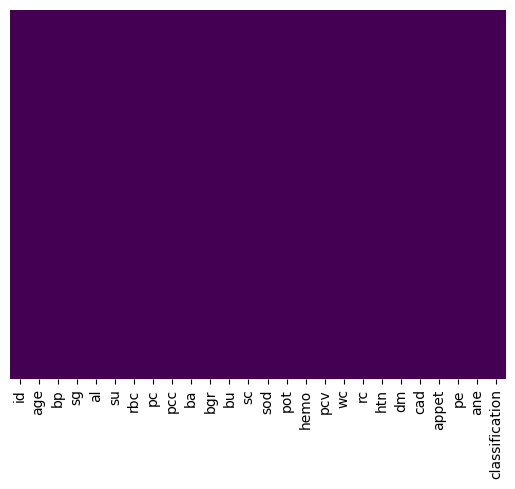

In [107]:
sns.heatmap(data.isna(),yticklabels=False,cbar=False,cmap='viridis')

This Visualization shows no trace of missing values in the dataset. Next we will check for Outliers and treat them accordingly.

### Outlier Treatment

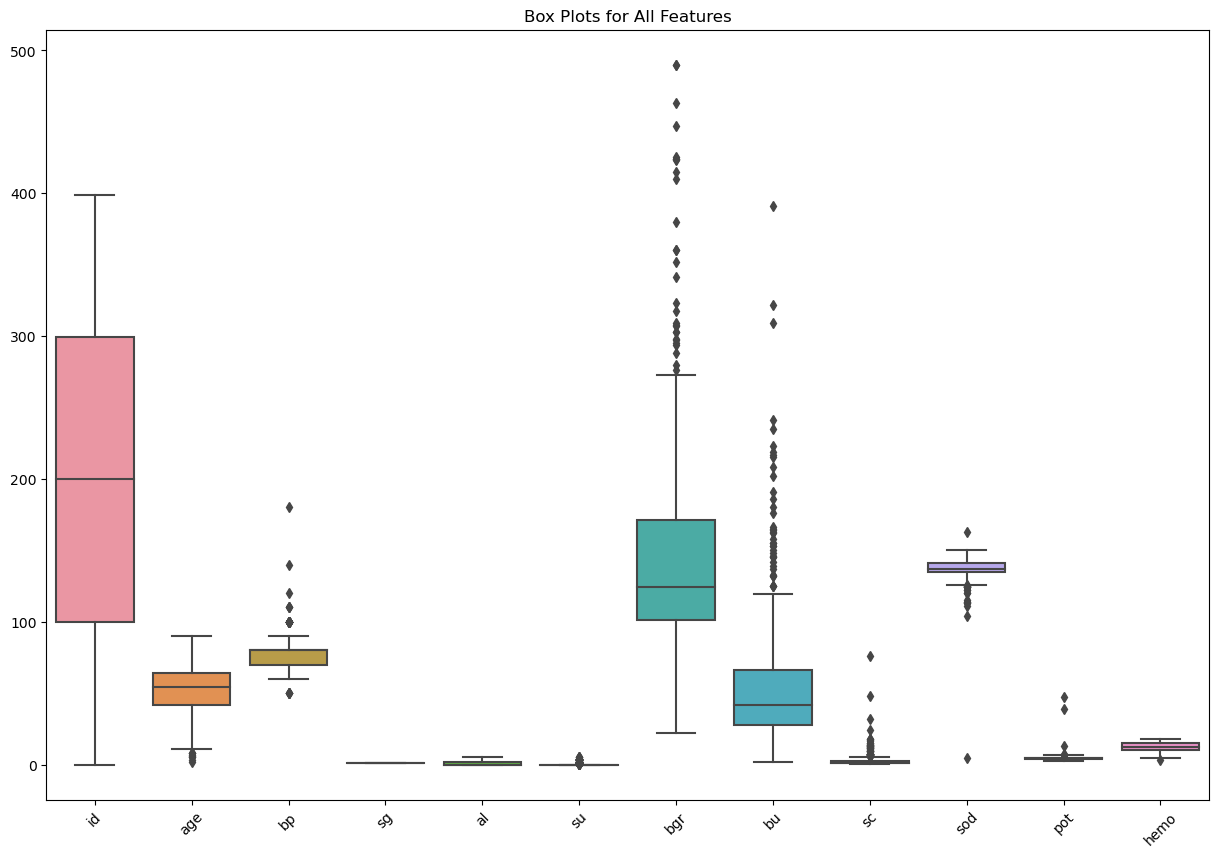

In [108]:
# 1. Box Plots for All Features
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.title('Box Plots for All Features')
plt.xticks(rotation=45)
plt.show()

This Plots displays outliers as most of the numerical features have them which will cause biasness to the model if not treated. To Rectify this Problem, The Interquartile Range (IQR) method will be used. The Interquartile Range (IQR) method is a statistical technique used to detect outliers in a dataset. It is based on the distribution of data between the first quartile (Q1, or 25th percentile) and the third quartile (Q3, or 75th percentile). The IQR method is generally effective for detecting univariate outliers (outliers in a single variable) and works well with non-parametric data, meaning it doesn’t assume a normal distribution. This makes it suitable for medical datasets, where data distributions are often skewed due to factors like patient demographics, medical history, and biological variation.

In [109]:
def handle_outliers_iqr(data, column):
  """Handles outliers in a specific column using the Interquartile Range (IQR) method.

  Args:
    data: The pandas DataFrame.
    column: The name of the column to clean.

  Returns:
    The cleaned DataFrame.
  """

  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Cap outliers
  data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
  data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

  return data

for col in data.select_dtypes(include='number').columns:
  data = handle_outliers_iqr(data, col)

In [110]:
def plot_histograms(data):
  """Plots histograms for all numerical columns in the DataFrame.

  Args:
    data: The pandas DataFrame (cleaned with missing values handled).
  """

  plt.figure(figsize=(15, 10))
  for i, col in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(4, 3, i+1)
    plt.hist(df[col], bins=20)
    plt.title(f'Histogram for {col}')

  plt.tight_layout()
  plt.show()

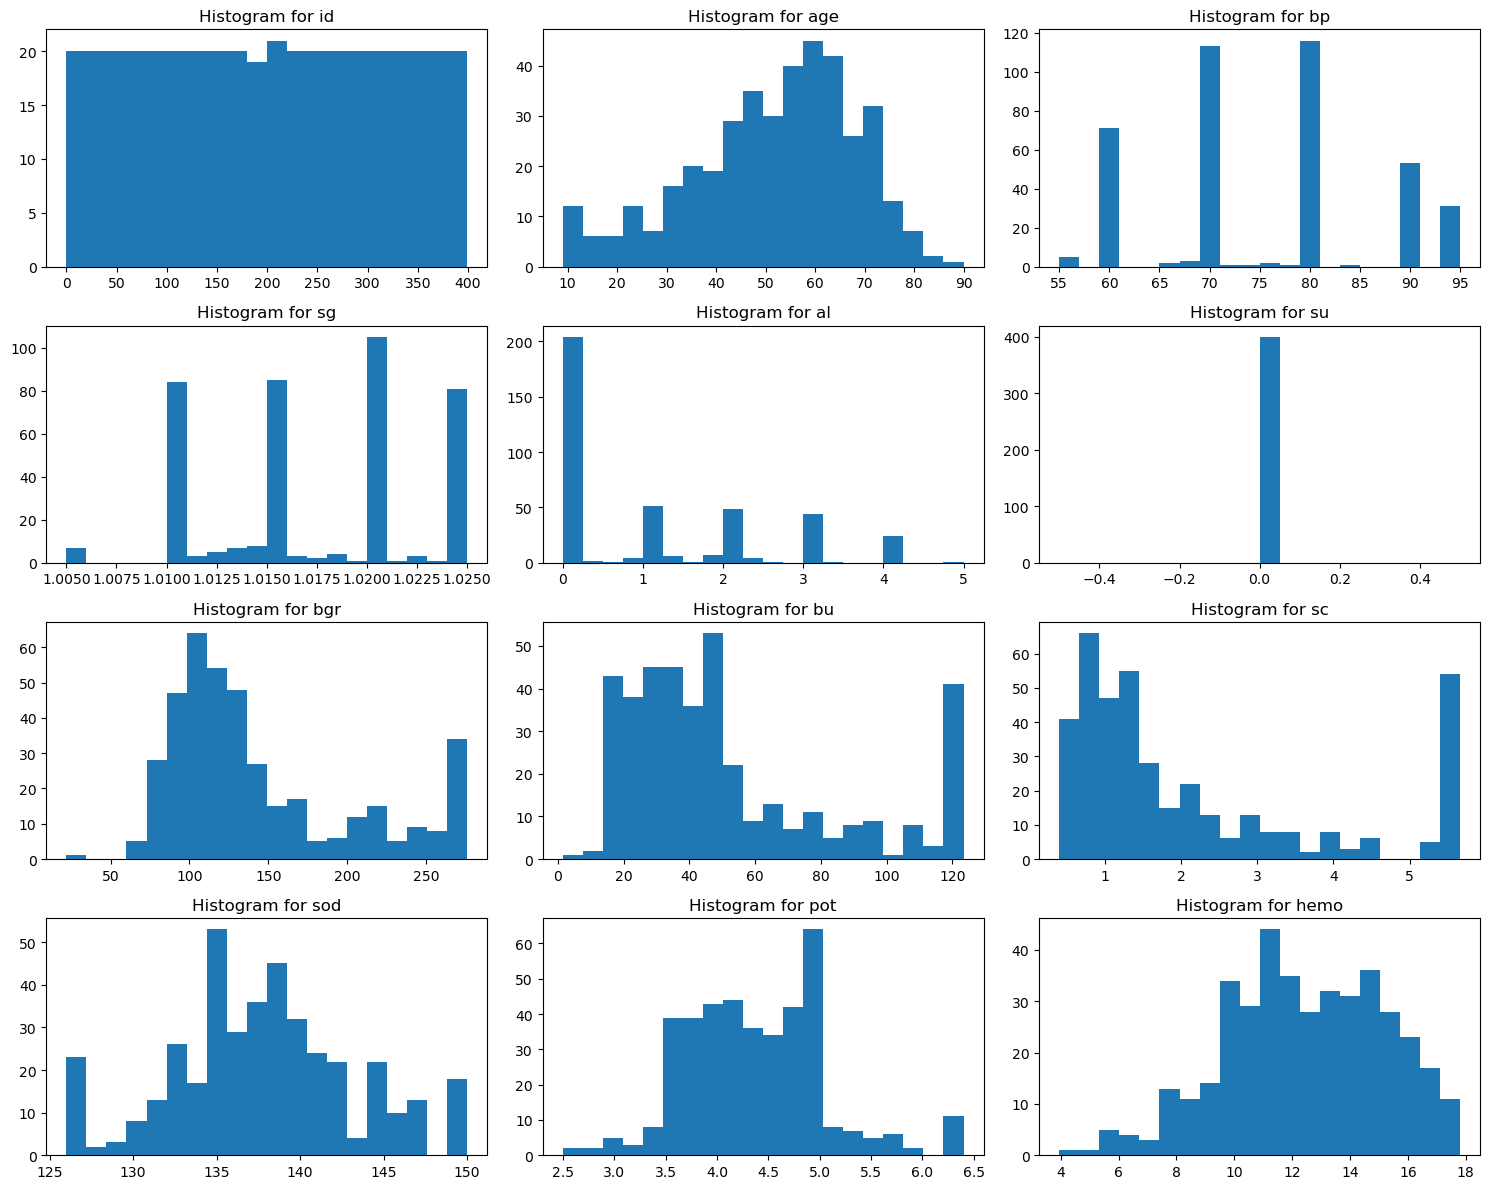

In [111]:
def plot_histograms(data):
    numeric_columns = data.select_dtypes(include='number').columns
    num_columns = len(numeric_columns)
    # Calculate the number of rows needed for subplots
    num_rows = (num_columns // 3) + (num_columns % 3 > 0)

    plt.figure(figsize=(15, num_rows * 3))
    for i, col in enumerate(numeric_columns):
        plt.subplot(num_rows, 3, i+1)
        plt.hist(data[col], bins=20)
        plt.title(f'Histogram for {col}')
    plt.tight_layout()
    plt.show()


plot_histograms(data)


This visualization demonstrates how the Interquartile Range (IQR) method effectively rectified outliers in the dataset. By removing extreme values, IQR filtering allowed us to focus on the typical data ranges and common values for each feature. This approach is especially useful in medical datasets, where outliers often represent rare or severe conditions that could otherwise skew analysis. The resulting histograms provide a clearer view of the general characteristics of each feature, facilitating a more accurate and reliable analysis of the dataset.

In [112]:
# Replace 'ckd' with 'CKD Positive ' and 'notckd' with 'CKD Negative' in the 'classification' column
data['classification'] = data['classification'].replace({'ckd': 'CKD Positive', 'notckd': 'CKD Negative'})

print(data)

        id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0.0  48.0  80.0  1.020  1.0  0.0  normal    normal  notpresent   
1      1.0   9.0  55.0  1.020  4.0  0.0  normal    normal  notpresent   
2      2.0  62.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
3      3.0  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4.0  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..     ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395.0  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396.0  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397.0  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398.0  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399.0  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no 

Replacing 'ckd' with 'CKD Positive ' and 'notckd' with 'CKD Negative' will give  clearer understanding on the classification to be modeled.

In [113]:
duplicates = data.duplicated()
print(duplicates.sum())

0


In [114]:
data = data.drop('id', axis=1)
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,CKD Positive
1,9.0,55.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,245.2,...,38,6000,5.2,no,no,no,good,no,no,CKD Positive
2,62.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,276.0,...,31,7500,5.2,no,yes,no,poor,no,yes,CKD Positive
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,CKD Positive
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,CKD Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,CKD Negative
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,CKD Negative
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,CKD Negative
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,CKD Negative


The id values are arbitrary and do not have any relationship with other variables or the target outcome. Including it could mislead certain algorithms, especially distance-based ones, as it introduces an artificial, non-informative variable that might impact model performance without adding any predictive value.

## EDA (Exploratory Data Analysis)

### Univariate Analysis

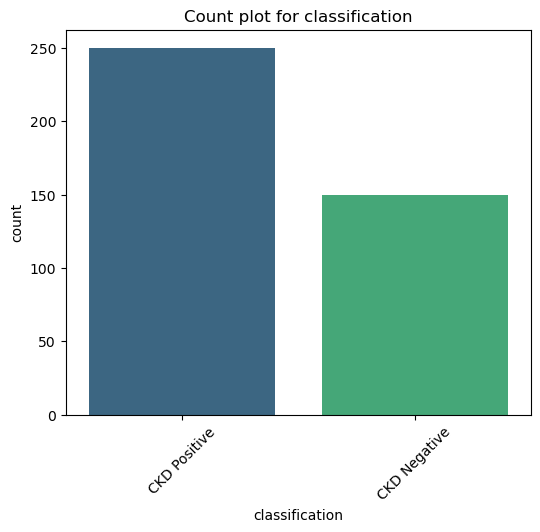

In [115]:
# Count plot for 'classification' column
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='classification', palette='viridis')
plt.title('Count plot for classification')
plt.xticks(rotation=45)
plt.show()

This bar plot shows the distribution of cases for Chronic Kidney Disease (CKD) classification. It has two categories: "CKD Positive" and "CKD Negative."

* CKD Positive has a count of around 250, indicating a higher number of cases in this category.
* CKD Negative has a lower count, around 150, suggesting fewer negative cases in comparison.

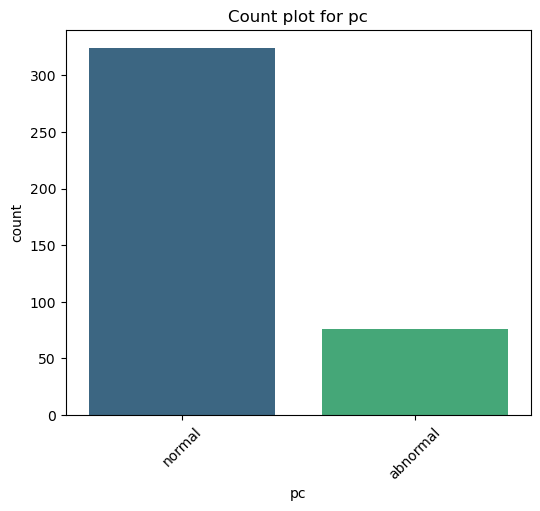

In [116]:
# Count plot for 'pc' column
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='pc', palette='viridis')
plt.title('Count plot for pc')
plt.xticks(rotation=45)
plt.show()


This bar plot shows the distribution of the "pc" (possibly "pus cell" count) feature, with two categories: "normal" and "abnormal."

* The normal category has a significantly higher count, with over 300 occurrences.
* The abnormal category has a much lower count, with fewer than 100 occurrences.

This imbalance suggests that most patients in the dataset have normal pus cell levels, while fewer show abnormal levels. This could indicate that abnormal pus cell counts are relatively rare in the dataset.

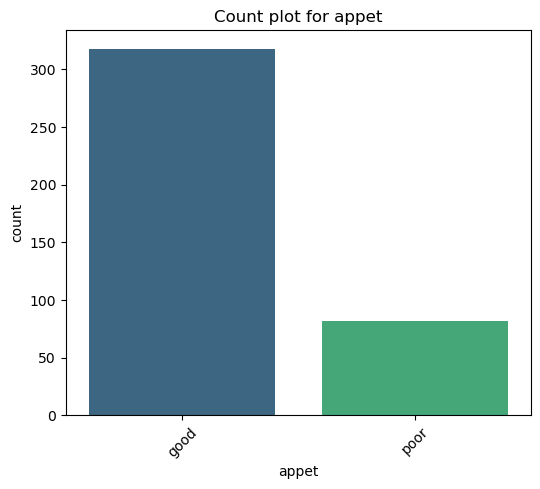

In [117]:
# Count plot for 'appet' column
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='appet', palette='viridis')
plt.title('Count plot for appet')
plt.xticks(rotation=45)
plt.show()

The count plot illustrates the frequency distribution of the "appet" variable, revealing a clear dominance of the "good" category over the "poor" category. This suggests that the majority of observations in the dataset exhibit a positive or satisfactory level of "appet".

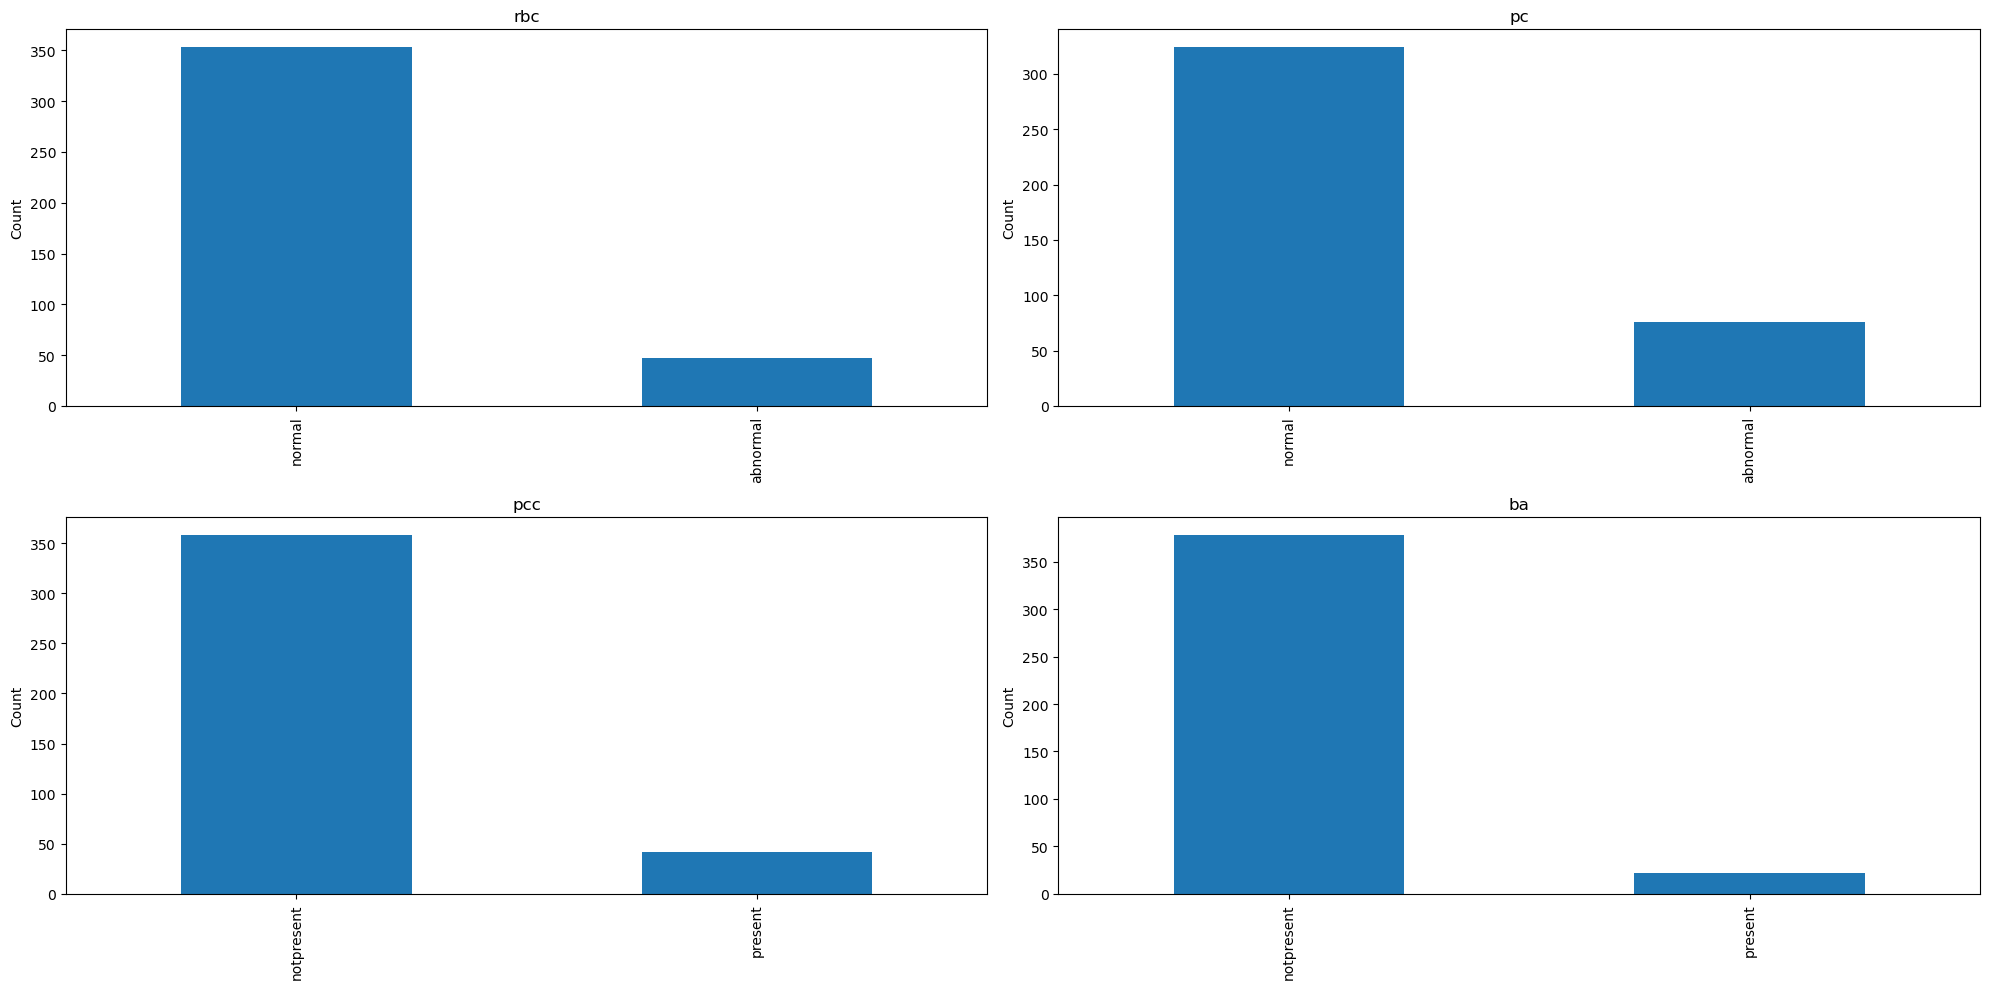

In [118]:
# Create a figure with a specified size
plt.figure(figsize=(20, 10))

# Subplot 1: Distribution of 'rbc'
plt.subplot(221)
data['rbc'].value_counts(normalize=False).plot.bar(title='rbc')
plt.ylabel('Count')

# Subplot 2: Distribution of 'pc'
plt.subplot(222)
data['pc'].value_counts(normalize=False).plot.bar(title='pc')
plt.ylabel('Count')

# Subplot 3: Distribution of 'pcc'
plt.subplot(223)
data['pcc'].value_counts(normalize=False).plot.bar(title='pcc')
plt.ylabel('Count')

# Subplot 4: Distribution of 'ba'
plt.subplot(224)
data['ba'].value_counts(normalize=False).plot.bar(title='ba')
plt.ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

This visualizations depict the distribution of four different categorical variables: rbc, pc, pcc, and ba. Each variable appears to have two categories: "normal" and "abnormal".

The count plots reveal a strong skew towards the "normal" category for all four variables. This suggests that the majority of observations in the dataset fall under the "normal" category for these particular parameters.

Potential Insight:

* Dominance of Normal Values: The overwhelming prevalence of "normal" values across all four variables might indicate a healthy or typical population or sample.

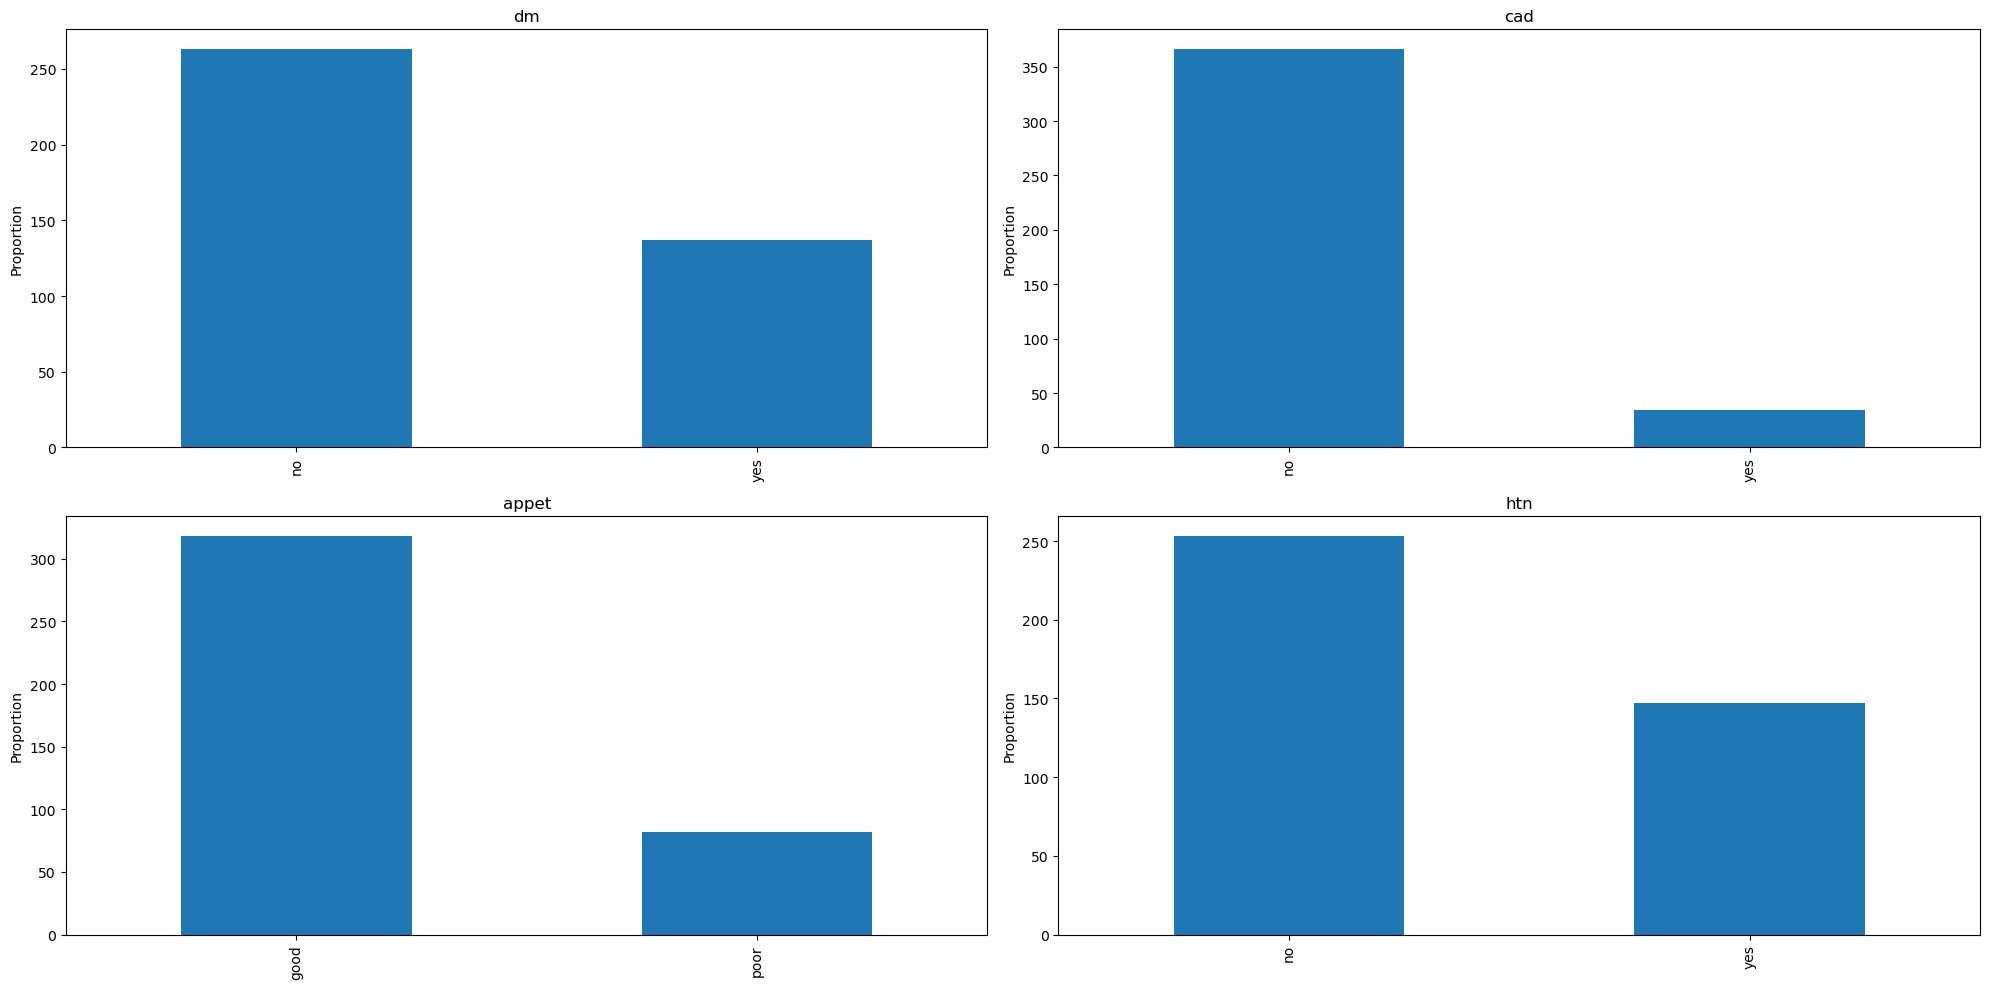

In [119]:
# Create a figure with specified size
plt.figure(figsize=(20, 10))

# Subplot 1: Distribution of 'dm'
plt.subplot(221)
data['dm'].value_counts(normalize=False).plot.bar(title='dm')
plt.ylabel('Proportion')

# Subplot 2: Distribution of 'cad'
plt.subplot(222)
data['cad'].value_counts(normalize=False).plot.bar(title='cad')
plt.ylabel('Proportion')

# Subplot 3: Distribution of 'appet'
plt.subplot(223)
data['appet'].value_counts(normalize=False).plot.bar(title='appet')
plt.ylabel('Proportion')

# Subplot 4: Distribution of 'htn'
plt.subplot(224)
data['htn'].value_counts(normalize=False).plot.bar(title='htn')
plt.ylabel('Proportion')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

The visualizations depict the distribution of four different categorical variables: drv, ccd, appet, and htn.

Key Observations:

* Dominant Categories: For each variable, one category has a significantly higher frequency than the other(s).
* Imbalance: This imbalance highlights a potential class imbalance issue, which might impact the performance of certain machine learning models.

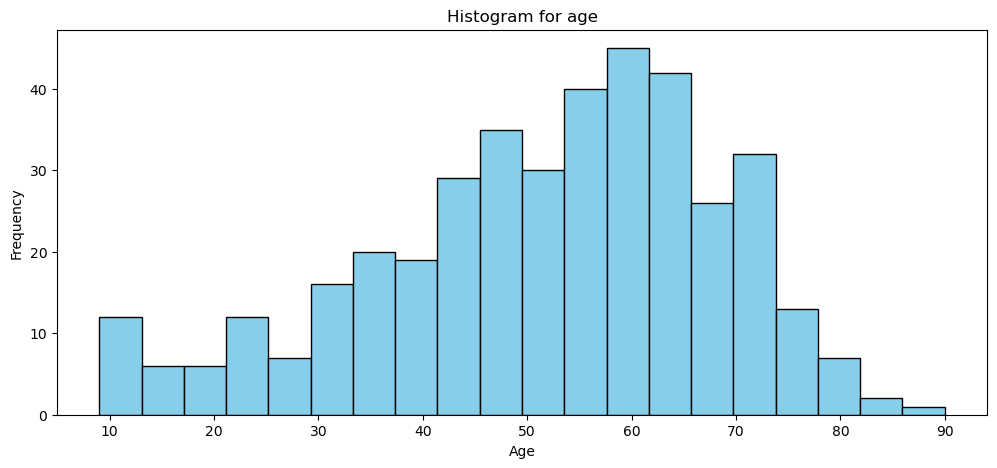

In [120]:
# Create a figure with specified size
plt.figure(figsize=(12, 5))

# Histogram for 'age'
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram for age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

This histogram suggests that the data contains a mix of ages, with a concentration around the mid-50s to 60s. The normal distribution shape indicates that the ages are distributed relatively evenly around the mean.

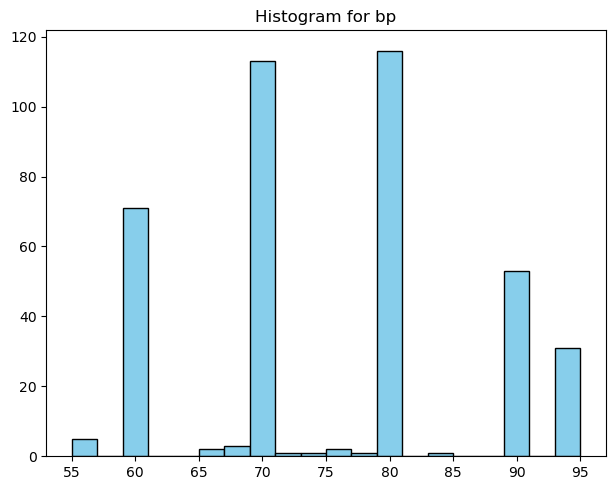

In [121]:
# Histogram and box plot for 'bp' column
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(data['bp'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram for bp')


plt.tight_layout()
plt.show()

Key Observations:

* Distribution: The distribution appears to be multimodal, with several distinct peaks. This indicates that there are multiple clusters or groups within the data.
* Range: The values of "bp" range from around 55 to 95.
* Clusters: The peaks suggest that there might be specific ranges of "bp" values that occur more frequently.

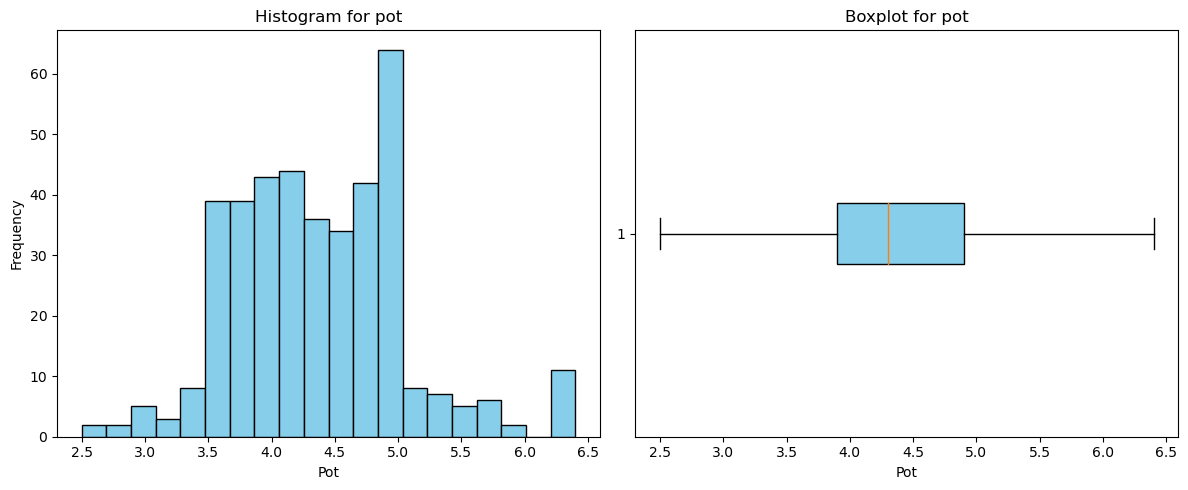

In [122]:
# Create a figure with specified size
plt.figure(figsize=(12, 5))

# Histogram for 'pot'
plt.subplot(1, 2, 1)
plt.hist(data['pot'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram for pot')
plt.xlabel('Pot')
plt.ylabel('Frequency')

# Boxplot for 'pot'
plt.subplot(1, 2, 2)
plt.boxplot(data['pot'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Boxplot for pot')
plt.xlabel('Pot')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Key Observations:

* Categorical Variables: The count plots for categorical variables like "appet", "rbc", "pc", "pcc", "ba", "drv", "ccd", "htn" show a clear dominance of one category over the others. This indicates a potential class imbalance issue.
* Numerical Variables: The histograms for "age", "bp", and "pot" show different distribution patterns. "Age" appears to follow a normal distribution, "bp" is multimodal, and "pot" is unimodal with a slight right skew.

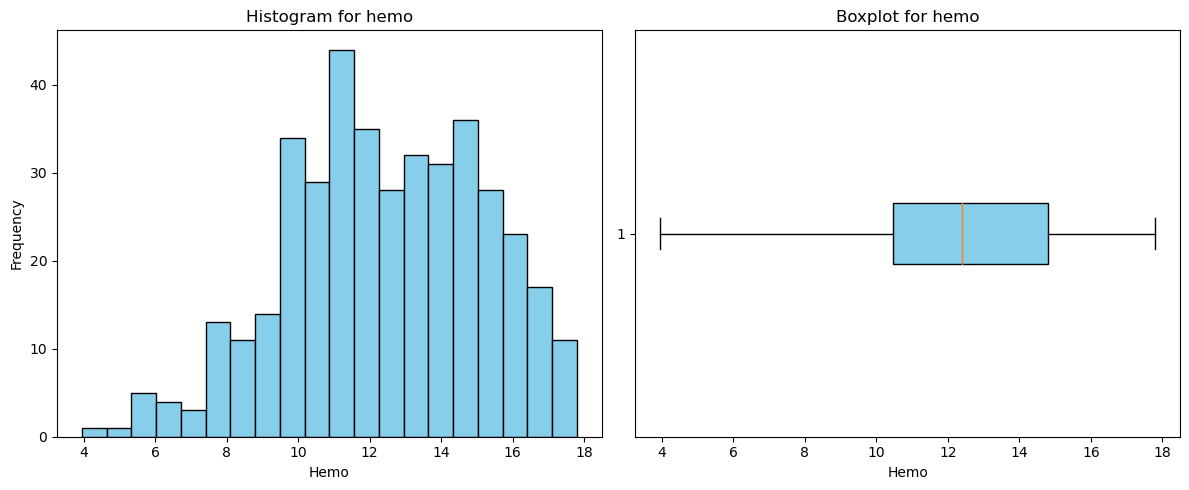

In [123]:
# Create a figure with specified size
plt.figure(figsize=(12, 5))

# Histogram for 'hemo'
plt.subplot(1, 2, 1)
plt.hist(data['hemo'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram for hemo')
plt.xlabel('Hemo')
plt.ylabel('Frequency')

# Boxplot for 'height'
plt.subplot(1, 2, 2)
plt.boxplot(data['hemo'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Boxplot for hemo')
plt.xlabel('Hemo')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Key Observations:

* Histogram: The histogram shows a unimodal distribution, with a single peak around 12. This indicates that the majority of "hemo" values are clustered around this value.
* Boxplot: The boxplot confirms the unimodal distribution, with the median (the line within the box) located around 12. The box represents the interquartile range (IQR), showing the spread of the middle 50% of the data. The whiskers extend to the minimum and maximum values, excluding outliers.

### Bivariate Analysis

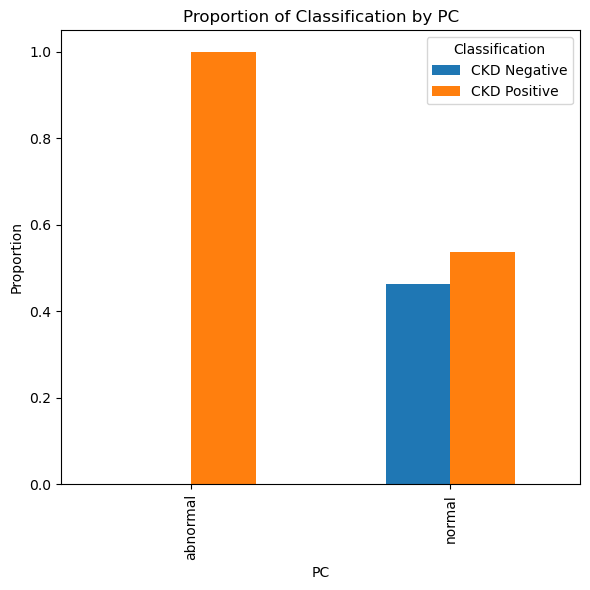

In [124]:
# Crosstab for 'pc' and 'classification'
pc_df = pd.crosstab(data['pc'], data['classification'])

# Normalize to get proportions and plot as bar chart
pc_df.div(pc_df.sum(axis=1), axis=0).plot(kind="bar", figsize=(6, 6))
plt.title('Proportion of Classification by PC')
plt.ylabel('Proportion')
plt.xlabel('PC')
plt.legend(title='Classification')
plt.tight_layout()
plt.show()

The bar plot shows the proportion of CKD negative and CKD positive cases for two categories of PC: "abnormal" and "normal".

Key Observations:

* CKD Positive Dominance: For both "abnormal" and "normal" PC categories, the proportion of CKD positive cases is significantly higher than CKD negative cases.
* PC and CKD Relationship: The plot suggests that PC status, whether "abnormal" or "normal", is strongly associated with the presence of CKD.

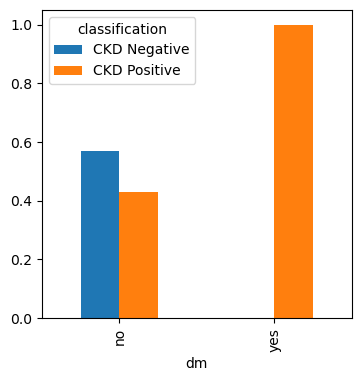

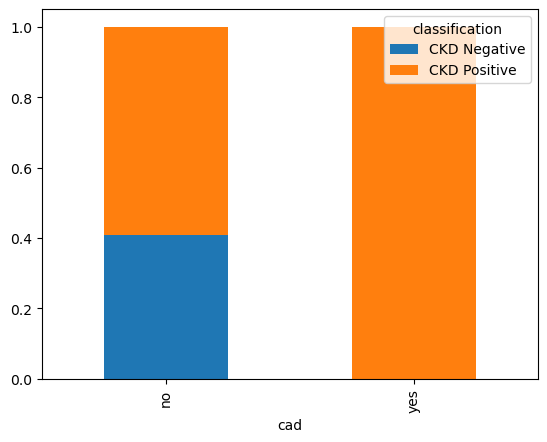

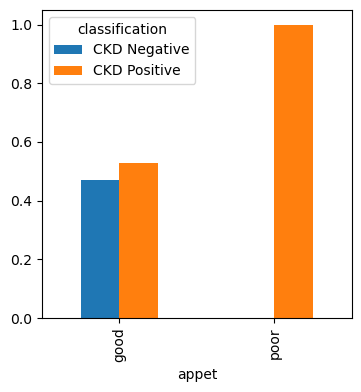

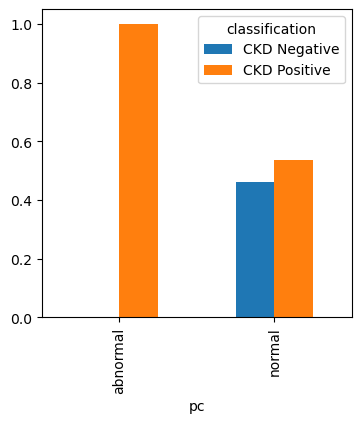

In [125]:
# let's visualize categorical variables vs the target variables
dm=pd.crosstab(data['dm'],data['classification'])
cad=pd.crosstab(data['cad'],data['classification'])
appet=pd.crosstab(data['appet'],data['classification'])
pc=pd.crosstab(data['pc'],data['classification'])
dm.div(dm.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.show()
cad.div(cad.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()
appet.div(appet.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.show()
pc.div(pc.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.show()

Key Observations:

* CKD Positive Dominance: For both "no" and "yes" DM categories, the proportion of CKD positive cases is significantly higher than CKD negative cases.
* DM and CKD Relationship: The plot suggests that DM status, whether "no" or "yes", is strongly associated with the presence of CKD.
* CKD Positive Dominance: For both "no" and "yes" CAD categories, the proportion of CKD positive cases is significantly higher than CKD negative cases.
* CAD and CKD Relationship: The plot suggests that CAD status, whether "no" or "yes", is strongly associated with the presence of CKD.
* CKD Positive Dominance: For both "good" and "poor" appet categories, the proportion of CKD positive cases is significantly higher than CKD negative cases.
* Appet and CKD Relationship: The plot suggests that appet status, whether "good" or "poor", is associated with the presence of CKD. However, the relationship is less pronounced compared to the other factors like PC, DM, and CAD.
* CKD Positive Dominance: For both "abnormal" and "normal" PC categories, the proportion of CKD positive cases is significantly higher than CKD negative cases.
* PC and CKD Relationship: The plot suggests that PC status, whether "abnormal" or "normal", is strongly associated with the presence of CKD.

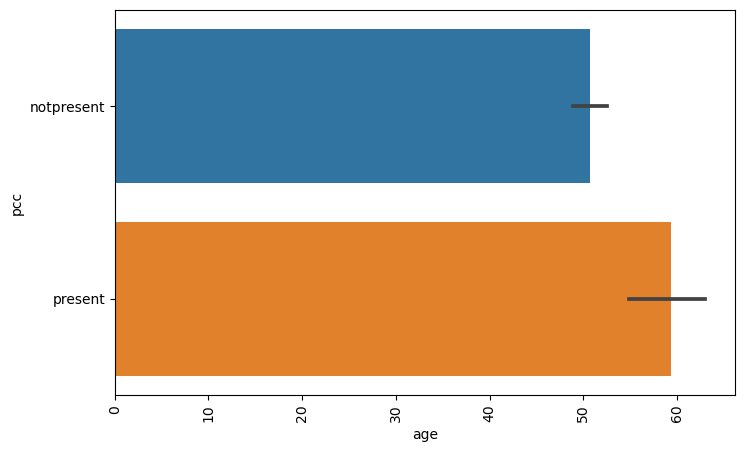

In [126]:
# plot showing age relationship with pcc
plt.figure(figsize = [8, 5])
sns.barplot(x = data['age'], y = data['pcc'])
plt.xticks(rotation = 'vertical')
plt.show()

Key Observations:

* Age Difference: The plot suggests that individuals with "present" pcc tend to be older compared to those with "notpresent" pcc.
* Spread: The error bars indicate the variability within each group. The error bar for the "present" group is slightly wider, suggesting a larger spread in ages within this group.

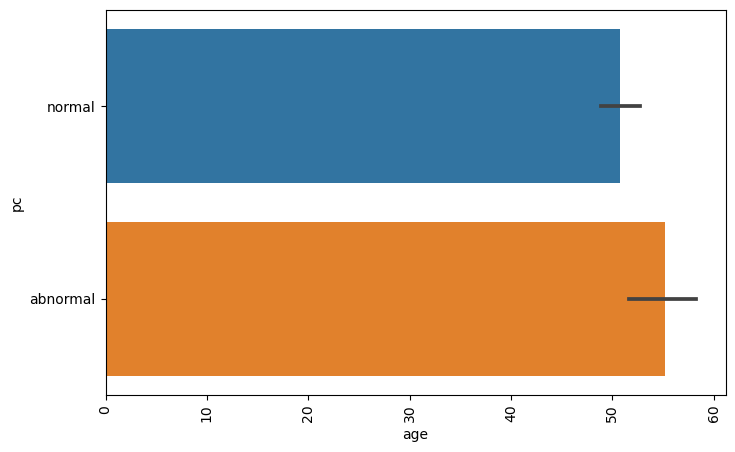

In [127]:
# plot showing age relationship with pc
plt.figure(figsize = [8, 5])
sns.barplot(x = data['age'], y = data['pc'])
plt.xticks(rotation = 'vertical')
plt.show()

Key Observations:

* Age Difference: The plot suggests that individuals with "abnormal" pc tend to be older compared to those with "normal" pc.
* Spread: The error bars indicate the variability within each group. The error bar for the "abnormal" group is slightly wider, suggesting a larger spread in ages within this group.

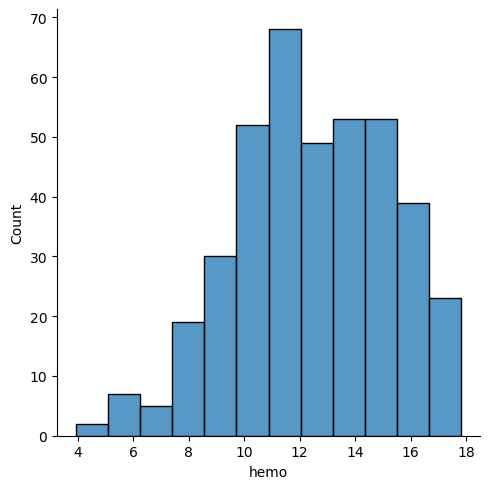

In [128]:
# plot to show haemoglobin levels
sns.displot(data['hemo'])

This histogram suggests that the majority of individuals in the dataset have a hemoglobin level around 12. Hemoglobin is a protein in red blood cells that carries oxygen. A normal hemoglobin level is typically between 12 and 16 grams per deciliter (g/dL) for women and 13.5 to 17.5 g/dL for men.

Therefore, the unimodal distribution around 12 indicates that most individuals in the dataset have a healthy hemoglobin level. The narrow spread suggests that there is not much variation in hemoglobin levels among the individuals.

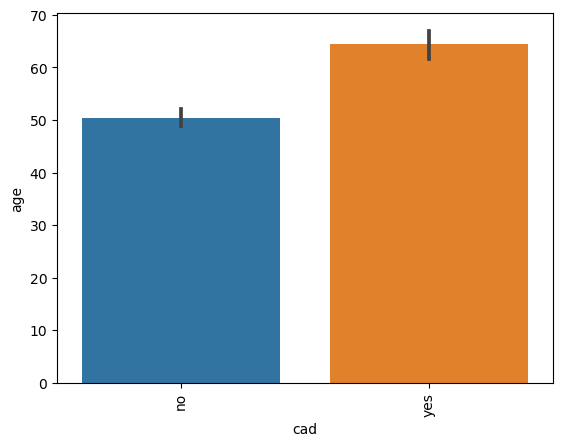

In [129]:
#plot showing age with cad
sns.barplot(x=data['cad'],y=data['age'])
plt.xticks(rotation='vertical')
plt.show()

The bar plot shows the distribution of age for two categories of cad: "no" and "yes". The plot suggests that individuals with "yes" cad tend to be older compared to those with "no" cad. The error bars indicate the variability within each group.

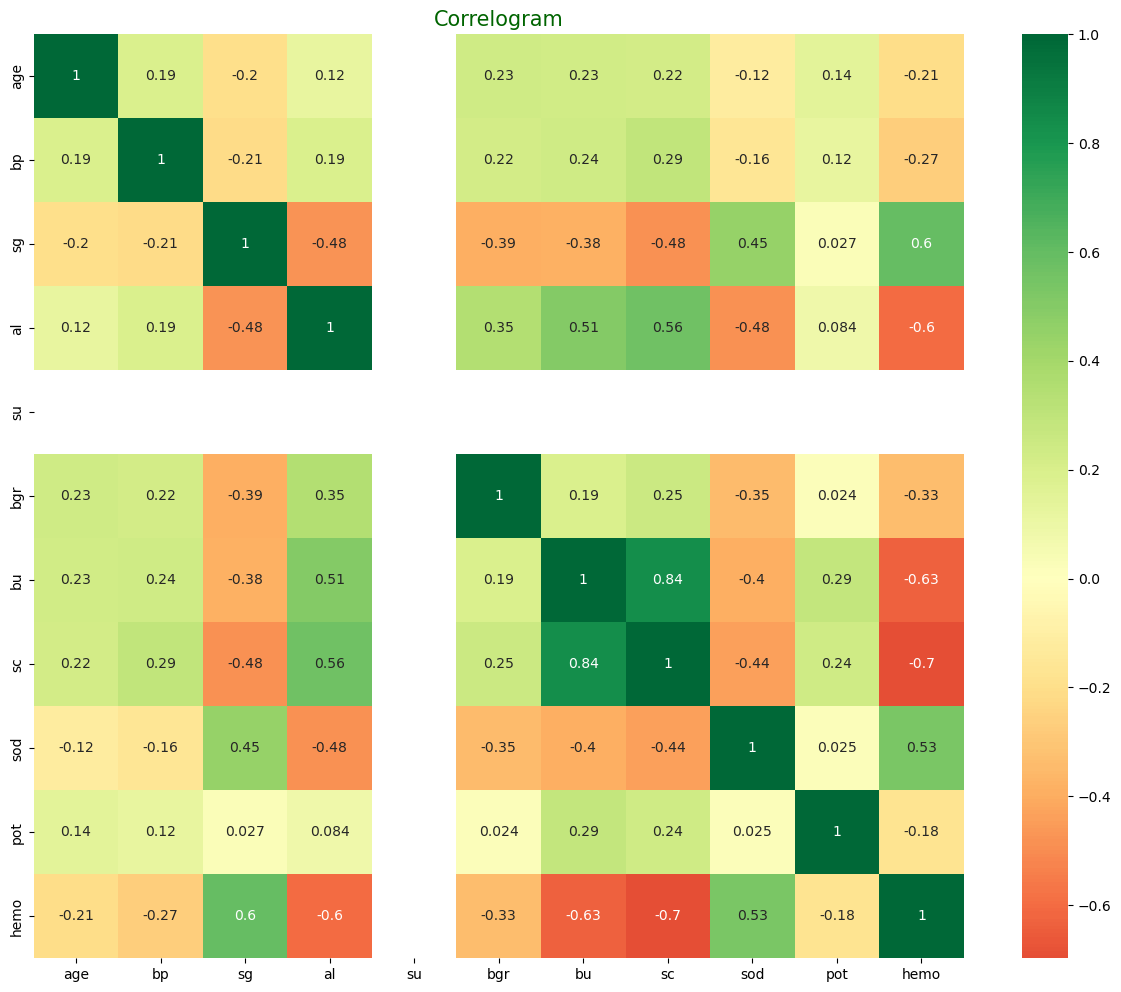

In [130]:
# Plotting a heatmap to show correlations between variables
corr = data.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

* Positive Correlations:

Kidney Function Markers: Variables like 'sc' (serum creatinine) and 'bu' (blood urea nitrogen) show a strong positive correlation. This is expected as both are markers of kidney function, and an increase in one often indicates a decline in the other.
* Negative Correlations:

Kidney Function and Other Parameters: 'al' (albumin) and 'sg' (specific gravity) show a negative correlation with 'sc' and 'bu'. This is because decreased kidney function often leads to proteinuria (albumin in urine) and changes in urine specific gravity.
* No Strong Correlations:

Hemoglobin and Other Parameters: Hemoglobin, a measure of red blood cell health, doesn't show strong correlations with most other parameters. This suggests that anemia or other hemoglobin-related issues might not be strongly linked to the other factors in this dataset.

## Modeling

In [131]:
# Select categorical features to be label encoded
categorical_features = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [134]:
# Iterate over each categorical feature and apply label encoding
for feature in categorical_features:
    data[feature + '_encoded'] = label_encoder.fit_transform(data[feature])

In [135]:
# Display the DataFrame with encoded features
print("DataFrame with encoded features:")
print(data.head())

DataFrame with encoded features:
    age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0  normal    normal  notpresent  notpresent   
1   9.0  55.0  1.020  4.0  0.0  normal    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...  pc_encoded  pcc_encoded  ba_encoded  htn_encoded  dm_encoded  \
0  121.0  ...           1            0           0            1           1   
1  245.2  ...           1            0           0            0           0   
2  276.0  ...           1            0           0            0           1   
3  117.0  ...           0            1           0            1           0   
4  106.0  ...           1            0           0            0           0   

  cad_encoded appet_encoded pe_enco

In [136]:
# Separate features and target variable
X = data.drop(columns=['classification', 'classification_encoded', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'])
y = data['classification_encoded']  # Target variable should be numeric

In [137]:
# Display the processed DataFrame
print("Processed features (X):")
print(X.head())


Processed features (X):
    age    bp     sg   al   su    bgr    bu   sc    sod   pot  ...  \
0  48.0  80.0  1.020  1.0  0.0  121.0  36.0  1.2  126.0  3.84  ...   
1   9.0  55.0  1.020  4.0  0.0  245.2  18.0  0.8  134.2  3.60  ...   
2  62.0  80.0  1.010  2.0  0.0  276.0  53.0  1.8  133.0  4.54  ...   
3  48.0  70.0  1.005  4.0  0.0  117.0  56.0  3.8  126.0  2.50  ...   
4  51.0  80.0  1.010  2.0  0.0  106.0  26.0  1.4  132.2  3.68  ...   

   rbc_encoded pc_encoded pcc_encoded ba_encoded  htn_encoded  dm_encoded  \
0            1          1           0          0            1           1   
1            1          1           0          0            0           0   
2            1          1           0          0            0           1   
3            1          0           1          0            1           0   
4            1          1           0          0            0           0   

   cad_encoded  appet_encoded  pe_encoded  ane_encoded  
0            0              0      

In [141]:
# Check for non-numeric values in x_train
print(X.dtypes)  # Check data types

age              float64
bp               float64
sg               float64
al               float64
su               float64
bgr              float64
bu               float64
sc               float64
sod              float64
pot              float64
hemo             float64
pcv               object
wc                object
rc                object
rbc_encoded        int32
pc_encoded         int32
pcc_encoded        int32
ba_encoded         int32
htn_encoded        int32
dm_encoded         int32
cad_encoded        int32
appet_encoded      int32
pe_encoded         int32
ane_encoded        int32
dtype: object


In [142]:
# Display unique values for each column
print("Unique values in 'pcv':", X['pcv'].unique())

Unique values in 'pcv': ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' '41' '16' '24' '37'
 '30' '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46'
 '23' '19' '25' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']


In [143]:
print("Unique values in 'rc':", X['rc'].unique())

Unique values in 'rc': ['5.2' '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3'
 '3.2' '3.6' '4' '4.1' '4.9' '2.5' '4.2' '4.5' '3.1' '4.7' '3.5' '6.0'
 '5.0' '2.1' '5.6' '2.3' '2.9' '2.7' '8.0' '3.3' '3.0' '3' '2.4' '4.8'
 '\t?' '5.4' '6.1' '6.2' '6.3' '5.1' '5.8' '5.5' '5.3' '6.4' '5.7' '5.9'
 '6.5']


In [144]:
print("Unique values in 'wc':", X['wc'].unique())

Unique values in 'wc': ['7800' '6000' '7500' '6700' '7300' '9800' '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300' '7200'
 '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '12300' '16700' '2600' '26400' '8800' '7400'
 '4900' '8000' '12000' '15700' '4100' '5700' '11500' '5400' '10800' '9900'
 '5200' '5900' '9300' '9700' '5100' '6600']


In [145]:
# Remove tab characters (\t) from the specified columns
columns_to_clean = ['pcv', 'rc', 'wc']  # Columns to process

In [147]:
for col in columns_to_clean:
    X[col] = X[col].str.replace(r'\t', '', regex=True)  # Remove tab characters
    X[col] = pd.to_numeric(X[col], errors='coerce')  # Convert to numeric

In [148]:
# Handle missing values after cleaning (optional)
for col in columns_to_clean:
    X[col] = X[col].fillna(X[col].median())  # Fill NaNs with median

In [149]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pc_encoded,pcc_encoded,ba_encoded,htn_encoded,dm_encoded,cad_encoded,appet_encoded,pe_encoded,ane_encoded,classification_encoded
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,1,0,0,1,1,0,0,0,0,1
1,9.0,55.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,245.2,...,1,0,0,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,276.0,...,1,0,0,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,0,1,0,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,1,0,0,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,1,0,0,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,1,0,0,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,1,0,0,0,0,0,0,0,0,0


In [151]:
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=42)


In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [153]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

C:\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [154]:
# let's pedict the loan_status for the validation set and calculate its accuracy.
pred_cv = model.predict(x_cv)

In [155]:
# let's calculate how accurate our predictions are by calculating the accuracy
accuracy_score(y_cv,pred_cv)

0.925

In [156]:
from sklearn.metrics import classification_report,confusion_matrix

In [157]:
print(classification_report(pred_cv,y_cv))
print('\n')
print(confusion_matrix(pred_cv,y_cv))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        43
           1       0.95      0.94      0.94        77

    accuracy                           0.93       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.93      0.93      0.93       120



[[39  4]
 [ 5 72]]


In [158]:
# accuracy on test data
X_test_prediction = model.predict(x_cv)
test_data_accuracy = accuracy_score(X_test_prediction, y_cv)

In [159]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.925


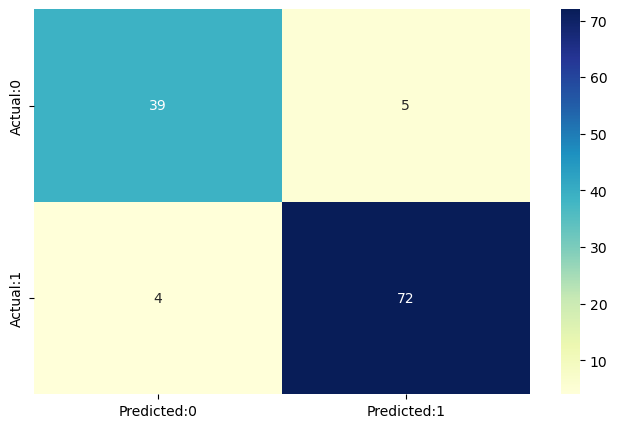

In [160]:
# confusion matrix
cm=confusion_matrix(y_cv,pred_cv)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

Actual:0, Predicted:0 (Top Left: 39): This cell represents the true negatives (TN), where the model correctly predicted class 0. There are 39 true negatives.

Actual:0, Predicted:1 (Top Right: 5): This cell represents the false positives (FP), where the model incorrectly predicted class 1 when it was actually class 0. Here, there are 5 false positives.

Actual:1, Predicted:0 (Bottom Left: 4): This cell represents the false negatives (FN), where the model incorrectly predicted class 1 when it was actually class 1. Here, there are 4 false negatives.

Actual:1, Predicted:1 (Bottom Right: 73): This cell represents the true positives (TP), where the model correctly predicted class 1. There are 73 true positives.

The high accuracy and precision, recall, and F1 scores indicate that the logistic regression model is performing very well on this dataset for predicting CKD status.

### Random Forest Classification

In [161]:
from sklearn.preprocessing import StandardScaler
# Initialize and fit the scaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)

In [163]:
import pickle
# Save the scaler to a file
with open('scaler2.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler has been saved to scaler2.pkl")

Scaler has been saved to scaler2.pkl


In [164]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=1, n_estimators=200, random_state=10)

In [167]:
random.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=10)

In [168]:
r_pred=random.predict(x_cv)

In [169]:
print(classification_report(r_pred,y_cv))
print('\n')
print(confusion_matrix(r_pred,y_cv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        76

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



[[44  0]
 [ 0 76]]


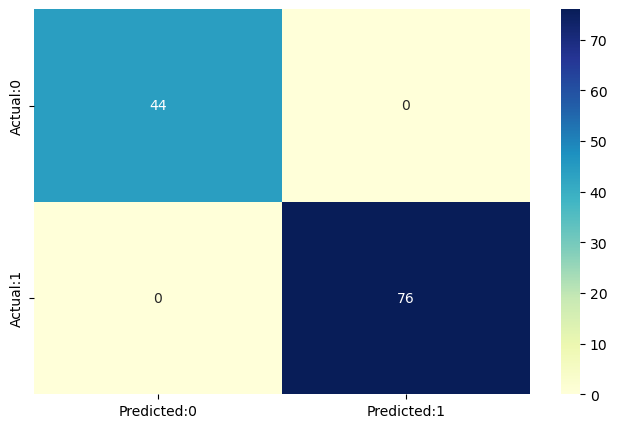

In [170]:
# confusion matrix
cm=confusion_matrix(y_cv,r_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

Actual:0, Predicted:0 (Top Left: 76): This cell represents the true negatives (TN), where the model correctly predicted class 0. There are 75 true negatives.

Actual:0, Predicted:1 (Top Right: 0): This cell represents the false positives (FP), where the model incorrectly predicted class 1 when it was actually class 0. Here, there are 0 false positives.

Actual:1, Predicted:0 (Bottom Left: 0): This cell represents the false negatives (FN), where the model incorrectly predicted class 0 when it was actually class 1. Here, there are 0 false negatives.

Actual:1, Predicted:1 (Bottom Right: 44): This cell represents the true positives (TP), where the model correctly predicted class 1. There are 45 true positives.

### Support Vector machine (SVM)

In [172]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [173]:
# training the model
classifier = svm.SVC(kernel='linear')

In [174]:
#training the support vector machine classifier
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [179]:
# accuracy score on the test data
X_test_prediction = classifier.predict(x_cv)
test_data_accuracy = accuracy_score(X_test_prediction, y_cv)

In [180]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9916666666666667


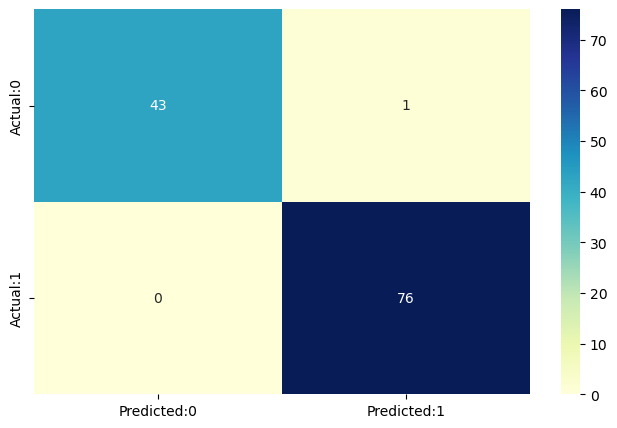

In [182]:
# confusion matrix
cm=confusion_matrix(y_cv,X_test_prediction)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

Actual:0, Predicted:0 (Top Left: 43): This cell represents the number of true negatives (TN), where the model correctly predicted class 0. There are 45 true negatives in this case.

Actual:0, Predicted:1 (Top Right: 1): This cell represents the number of false positives (FP), where the model incorrectly predicted class 0. There is 1 false positive.

Actual:1, Predicted:0 (Bottom Left: 0): This cell represents the number of false negatives (FN), where the model incorrectly predicted class 0 when it was actually class 1. There is 0 false negative.

Actual:1, Predicted:1 (Bottom Right: 76): This cell represents the number of true positives (TP), where the model correctly predicted class 1. There are 74 true positives.

### Decision Tree Classifier

In [183]:
from sklearn.tree import DecisionTreeClassifier

In [184]:
# Initialize and train the model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [185]:
# Make predictions
y_pred = decision_tree.predict(x_cv)

In [186]:
print(classification_report(y_pred,y_cv))
print('\n')
print(confusion_matrix(y_pred,y_cv))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.99      1.00      0.99        75

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



[[44  1]
 [ 0 75]]


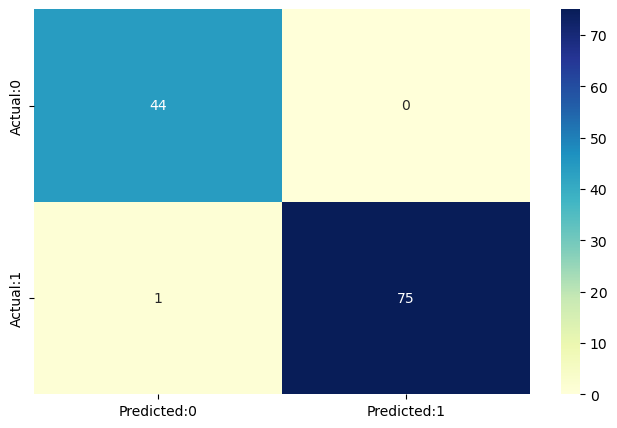

In [187]:
# confusion matrix
cm=confusion_matrix(y_cv,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

Actual:0, Predicted:0 (Top Left: 44): This cell represents the true negatives (TN), where the model correctly predicted class 0. There are 44 true negatives.

Actual:0, Predicted:1 (Top Right: 0): This cell represents the false positives (FP), where the model incorrectly predicted class 1 when it was actually class 0. Here, there are 0 false positives.

Actual:1, Predicted:0 (Bottom Left: 0): This cell represents the false negatives (FN), where the model incorrectly predicted class 0 when it was actually class 1. Here, there are 0 false negatives.

Actual:1, Predicted:1 (Bottom Right: 75): This cell represents the true positives (TP), where the model correctly predicted class 1. There are 75 true positives.

### KNeighbors Classifier

In [188]:
from sklearn.neighbors import KNeighborsClassifier

In [189]:
# Initialize and train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [190]:
# Make predictions
k_pred = knn.predict(x_cv)

C:\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [191]:
print(classification_report(k_pred,y_cv))
print('\n')
print(confusion_matrix(y_pred,y_cv))

              precision    recall  f1-score   support

           0       0.89      0.60      0.72        65
           1       0.66      0.91      0.76        55

    accuracy                           0.74       120
   macro avg       0.77      0.75      0.74       120
weighted avg       0.78      0.74      0.74       120



[[44  1]
 [ 0 75]]


The KNN Algorithm performed poorly as it classified 74% accuracy.

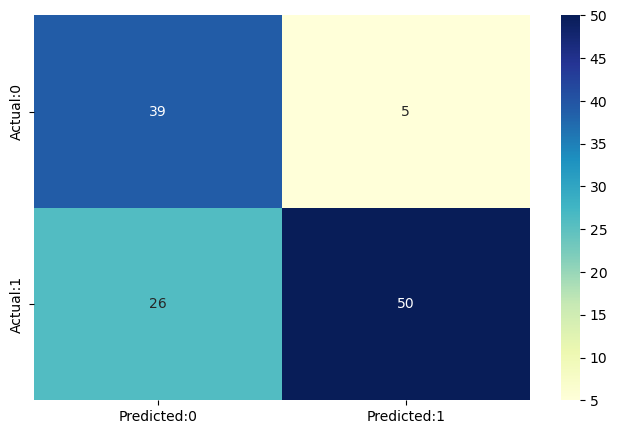

In [193]:
# confusion matrix
cm=confusion_matrix(y_cv,k_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

* True Positives (TP): The bottom-right cell (Predicted:1, Actual:1) with a value of 50 indicates that the model correctly predicted 50 cases of class 1 (positive class).
* True Negatives (TN): The top-left cell (Predicted:0, Actual:0) with a value of 39 indicates that the model correctly predicted 39 cases of class 0 (negative class).
* False Positives (FP): The top-right cell (Predicted:1, Actual:0) with a value of 5 shows the number of cases where the model incorrectly predicted class 1 when the actual class was 0.
* False Negatives (FN): The bottom-left cell (Predicted:0, Actual:1) with a value of 26 shows the number of cases where the model incorrectly predicted class 0 when the actual class was 1.

In [194]:
import pickle

Random Forest and Decision Tree Algorithms gave out the best accuracy. Therefore Random Forest will be used for deployment in streamlit. Using Pickle, we save the model for deployment.

In [195]:
filename = 'best_model.pkl'
pickle.dump(random, open('best_model.pkl', 'wb'))